# Visualization

[Effectively Using matplotlib](https://pbpython.com/effective-matplotlib.html)

[matplotlib FAQ](https://matplotlib.org/faq/usage_faq.html)

[How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/)

[A Guide To Getting Data Visualization Right](https://www.smashingmagazine.com/2023/01/guide-getting-data-visualization-right/)

General advice:
- look at your data - manually inspect it
- any kind of results summary can be useful
- people are good at spotting visual problems
- log data to text files, use notebooks to view from data on disk

Important visualization tools:
- matplotlib
- seaborn (wrapper around matplotlib)
- Plotly
- D3 (Javascript)

## Types of charts

- line
- scatter
- histogram
- bar

## Mistakes, we’ve drawn a few

https://medium.economist.com/mistakes-weve-drawn-a-few-8cdd8a42d368

### Truncating the scale

Putting break points in the scale distorts the chart

![](assets/truncating.png)

### Choosing scales to force relationships

![](assets/scales.png)

### Using a line chart to show trend

Instead use dots for the individual points, smoothed line for the trend

![](assets/trend.png)


## Matplotlib - a tale of three (?) API's

- MATLAB / state based interface
- object oriented 

The two main abstractions in matplotlib are the **Figure** and **Axes**
- Figure = final image (can have many Axes)
- Axes = individual plot


![](assets/mpl-faq.png)
[From the matplotlib FAQ](https://matplotlib.org/faq/usage_faq.html)

### API One - `plt.plot()`

pyplot level

In this API, the figure is automatically created, and the `plt.` always refer to the most recent figure.

This is a quick and dirty way to make a plot.  

It is shown only for reference (and to be able to understand other peoples code). 

**It is not recommended.**

You should consider upgrading via the '/Users/adam/.pyenv/versions/3.8.12/envs/teach/bin/python3.8 -m pip install --upgrade pip' command.


Text(0, 0.5, 'y-axis')

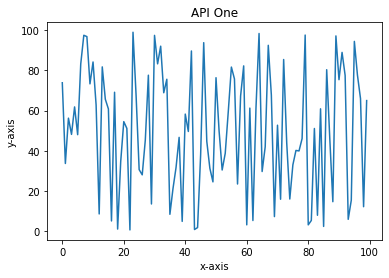

In [1]:
!pip install matplotlib -q
import matplotlib.pyplot as plt

x = np.random.uniform(0, 100, size=100)
y = np.random.uniform(0, 100, size=100)
line = plt.plot(x)

#  to get access to the figure and axes objects
fig = plt.figure(1)
axes = fig.axes

#  common operations
plt.title('API One')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
#plt.savefig('./one.png')

## API Two - `plt.subplots()`

The reccomended API
- more explicit & clear
- more typing
- multiple axes on the same figure

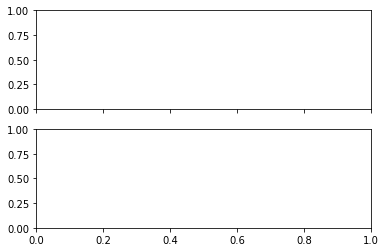

In [2]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

The `axes` object is a `np.array`:

In [3]:
axes[0]

<AxesSubplot:>

## API Three - `df.plot()`

Combination of pandas

In [4]:
#  returns the ax - very cool!
df = pd.DataFrame({
    'x': x, 'y': y
})
ax = df.plot(kind='barh', y="y", x="x")
ax.legend().set_visible(False)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

NameError: name 'pd' is not defined

## Changing plot style

In [ ]:
plt.style.available
plt.style.use('ggplot')

## Making gifs with matplotlib

# Changing dimensionality for visualization

Most commonly, we want a 2D representation of data to be able to plot it.  

Often our data is a higher dimension
- sometimes it can be lower (plot a latent space into 2D)

## t-SNE

Can also be used to increase dimensionality!
- use case = transforming a 1D latent space of an autoencoder to 2D

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import seaborn as sns

digits = load_digits()

In [ ]:
x = digits['data']
y = digits['target']
x.shape

In [ ]:
tsne = TSNE(n_components=2)
trans = tsne.fit_transform(x)
trans.shape

In [ ]:
sns.scatterplot(trans[:,0], trans[:,1], hue=y, legend='full', palette=sns.color_palette("bright", 10))

[How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/)

- cluster sizes & distances are unstable

Hyperparameter perplexity
- balances between the local & global aspects of the data
- original paper suggests t-SNE is robust to values between 5-50
- in practice, you should look at a few different perplexities


In [ ]:
tsne = TSNE(n_components=2, perplexity=25)
trans = tsne.fit_transform(x)
sns.scatterplot(trans[:,0], trans[:,1], hue=y, legend='full', palette=sns.color_palette("bright", 10))

In [ ]:
tsne = TSNE(n_components=2, perplexity=50)
trans = tsne.fit_transform(x)
sns.scatterplot(trans[:,0], trans[:,1], hue=y, legend='full', palette=sns.color_palette("bright", 10))

## PCA

Only used for dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
trans = pca.fit_transform(x)
sns.scatterplot(trans[:,0], trans[:,1], hue=y, legend='full', palette=sns.color_palette("bright", 10))

In [ ]:
sum(pca.explained_variance_ratio_)